### Student Name:  Jonathan Little

In [1]:
#TODO: import the modules
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

### Step 1 – Explain any overfitting or underfitting in the previous model

In [ ]:
# Previous Model

# The model in the previous notebook was definitely not overfit because of the fact it did not score very well on the test 
# set.  This should be an indication that it would not generalize well to unsee data.  However, it was not so poorly fit that 
# random guessing would score higher.  The fact that some of the models predictions were correct leads to the belief that
# with tuning it can be a successful model in theory.  

### Step 2 – Load the data and extract the features

In [7]:
#TODO: load the data and extract the features: 'VendorID', RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip'

features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

data = pd.read_csv("data/trip_data.csv", usecols = features)
data.head()

#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = data.iloc[:,0:14].to_numpy() #input features
y = data.iloc[:,14].tolist() #labels

### Step 3 – Split the data
The test set should comprise 30% of the dataset. Ensure the data is randomized and that stratified samples are obtained.

In [9]:
#TODO: Split the dataset into a training set and a test set
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = .3, 
                                                    random_state = seed,
                                                    stratify = y
                                                   ) 


### Step 4 – Instantiate the Decision Tree Classifer

In [10]:
dt_estimator = DecisionTreeClassifier()

### Step 5 – Create a dictionary that contains the decision tree parameters

In [88]:
from random import seed
from random import randint
seed(seed)

depth = []
split = []

for i in range(0,3):
    depth.append(randint(5,15))
    
for i in range(0,10):
    split.append(randint(100,500))

params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth': depth, #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split':split #TODO: provide a list of ten numbers between 100 and 500.
}
#confirming param inputs
print(depth)
print(split)

[10, 11, 15]
[430, 485, 317, 268, 276, 410, 305, 333, 104, 167]


### Step 6 – Perform the Random search
Provide the dictionary from step 5 above and use the decison tree from step 4 as the estimator.

In [91]:
seed(seed)
iterate = randint(50,100)

rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter= iterate,#TODO: set n_iter to a value between 50 and 100
                                 cv=10) #TODO: set the number of folds to 10 for the cross validation


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.
print(f"Number of iterations:{iterate}")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 60 is smaller than n_iter=70. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.797, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.796, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.795, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.803, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.802, total=   0.9s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.788, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.802, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini, score=0.800, total=   1.0s
[CV] min_samples_split=430, max_depth=10, criterion=gini .............
[CV]  min_samples_split=430, max_depth=10, criterion=gini,

[CV]  min_samples_split=410, max_depth=10, criterion=gini, score=0.790, total=   1.1s
[CV] min_samples_split=410, max_depth=10, criterion=gini .............
[CV]  min_samples_split=410, max_depth=10, criterion=gini, score=0.803, total=   1.0s
[CV] min_samples_split=410, max_depth=10, criterion=gini .............
[CV]  min_samples_split=410, max_depth=10, criterion=gini, score=0.800, total=   1.1s
[CV] min_samples_split=410, max_depth=10, criterion=gini .............
[CV]  min_samples_split=410, max_depth=10, criterion=gini, score=0.798, total=   1.2s
[CV] min_samples_split=410, max_depth=10, criterion=gini .............
[CV]  min_samples_split=410, max_depth=10, criterion=gini, score=0.804, total=   1.0s
[CV] min_samples_split=305, max_depth=10, criterion=gini .............
[CV]  min_samples_split=305, max_depth=10, criterion=gini, score=0.811, total=   1.0s
[CV] min_samples_split=305, max_depth=10, criterion=gini .............
[CV]  min_samples_split=305, max_depth=10, criterion=gini,

[CV]  min_samples_split=430, max_depth=11, criterion=gini, score=0.816, total=   1.1s
[CV] min_samples_split=430, max_depth=11, criterion=gini .............
[CV]  min_samples_split=430, max_depth=11, criterion=gini, score=0.819, total=   1.1s
[CV] min_samples_split=485, max_depth=11, criterion=gini .............
[CV]  min_samples_split=485, max_depth=11, criterion=gini, score=0.811, total=   1.1s
[CV] min_samples_split=485, max_depth=11, criterion=gini .............
[CV]  min_samples_split=485, max_depth=11, criterion=gini, score=0.815, total=   1.1s
[CV] min_samples_split=485, max_depth=11, criterion=gini .............
[CV]  min_samples_split=485, max_depth=11, criterion=gini, score=0.812, total=   1.1s
[CV] min_samples_split=485, max_depth=11, criterion=gini .............
[CV]  min_samples_split=485, max_depth=11, criterion=gini, score=0.821, total=   1.2s
[CV] min_samples_split=485, max_depth=11, criterion=gini .............
[CV]  min_samples_split=485, max_depth=11, criterion=gini,

[CV]  min_samples_split=305, max_depth=11, criterion=gini, score=0.825, total=   1.1s
[CV] min_samples_split=305, max_depth=11, criterion=gini .............
[CV]  min_samples_split=305, max_depth=11, criterion=gini, score=0.824, total=   1.1s
[CV] min_samples_split=305, max_depth=11, criterion=gini .............
[CV]  min_samples_split=305, max_depth=11, criterion=gini, score=0.832, total=   1.1s
[CV] min_samples_split=305, max_depth=11, criterion=gini .............
[CV]  min_samples_split=305, max_depth=11, criterion=gini, score=0.830, total=   1.1s
[CV] min_samples_split=305, max_depth=11, criterion=gini .............
[CV]  min_samples_split=305, max_depth=11, criterion=gini, score=0.824, total=   1.1s
[CV] min_samples_split=305, max_depth=11, criterion=gini .............
[CV]  min_samples_split=305, max_depth=11, criterion=gini, score=0.828, total=   1.1s
[CV] min_samples_split=305, max_depth=11, criterion=gini .............
[CV]  min_samples_split=305, max_depth=11, criterion=gini,

[CV]  min_samples_split=485, max_depth=15, criterion=gini, score=0.850, total=   1.2s
[CV] min_samples_split=485, max_depth=15, criterion=gini .............
[CV]  min_samples_split=485, max_depth=15, criterion=gini, score=0.840, total=   1.2s
[CV] min_samples_split=485, max_depth=15, criterion=gini .............
[CV]  min_samples_split=485, max_depth=15, criterion=gini, score=0.854, total=   1.2s
[CV] min_samples_split=485, max_depth=15, criterion=gini .............
[CV]  min_samples_split=485, max_depth=15, criterion=gini, score=0.850, total=   1.2s
[CV] min_samples_split=485, max_depth=15, criterion=gini .............
[CV]  min_samples_split=485, max_depth=15, criterion=gini, score=0.855, total=   1.2s
[CV] min_samples_split=485, max_depth=15, criterion=gini .............
[CV]  min_samples_split=485, max_depth=15, criterion=gini, score=0.850, total=   1.3s
[CV] min_samples_split=317, max_depth=15, criterion=gini .............
[CV]  min_samples_split=317, max_depth=15, criterion=gini,

[CV]  min_samples_split=305, max_depth=15, criterion=gini, score=0.876, total=   1.3s
[CV] min_samples_split=305, max_depth=15, criterion=gini .............
[CV]  min_samples_split=305, max_depth=15, criterion=gini, score=0.872, total=   1.3s
[CV] min_samples_split=305, max_depth=15, criterion=gini .............
[CV]  min_samples_split=305, max_depth=15, criterion=gini, score=0.877, total=   1.3s
[CV] min_samples_split=333, max_depth=15, criterion=gini .............
[CV]  min_samples_split=333, max_depth=15, criterion=gini, score=0.870, total=   1.3s
[CV] min_samples_split=333, max_depth=15, criterion=gini .............
[CV]  min_samples_split=333, max_depth=15, criterion=gini, score=0.864, total=   0.9s
[CV] min_samples_split=333, max_depth=15, criterion=gini .............
[CV]  min_samples_split=333, max_depth=15, criterion=gini, score=0.865, total=   1.1s
[CV] min_samples_split=333, max_depth=15, criterion=gini .............
[CV]  min_samples_split=333, max_depth=15, criterion=gini,

[CV]  min_samples_split=485, max_depth=10, criterion=entropy, score=0.797, total=   1.1s
[CV] min_samples_split=317, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=10, criterion=entropy, score=0.813, total=   1.1s
[CV] min_samples_split=317, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=10, criterion=entropy, score=0.806, total=   1.1s
[CV] min_samples_split=317, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=10, criterion=entropy, score=0.811, total=   1.1s
[CV] min_samples_split=317, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=10, criterion=entropy, score=0.797, total=   1.1s
[CV] min_samples_split=317, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=10, criterion=entropy, score=0.807, total=   1.1s
[CV] min_samples_split=317, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=1

[CV]  min_samples_split=333, max_depth=10, criterion=entropy, score=0.804, total=   1.2s
[CV] min_samples_split=333, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=10, criterion=entropy, score=0.809, total=   1.1s
[CV] min_samples_split=333, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=10, criterion=entropy, score=0.796, total=   1.1s
[CV] min_samples_split=333, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=10, criterion=entropy, score=0.804, total=   1.1s
[CV] min_samples_split=333, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=10, criterion=entropy, score=0.808, total=   1.1s
[CV] min_samples_split=333, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=10, criterion=entropy, score=0.808, total=   1.1s
[CV] min_samples_split=333, max_depth=10, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=1

[CV]  min_samples_split=317, max_depth=11, criterion=entropy, score=0.825, total=   1.2s
[CV] min_samples_split=317, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=11, criterion=entropy, score=0.826, total=   1.2s
[CV] min_samples_split=317, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=11, criterion=entropy, score=0.824, total=   1.1s
[CV] min_samples_split=317, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=11, criterion=entropy, score=0.828, total=   1.2s
[CV] min_samples_split=317, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=11, criterion=entropy, score=0.834, total=   1.2s
[CV] min_samples_split=317, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=11, criterion=entropy, score=0.823, total=   1.2s
[CV] min_samples_split=317, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=1

[CV]  min_samples_split=333, max_depth=11, criterion=entropy, score=0.822, total=   1.2s
[CV] min_samples_split=333, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=11, criterion=entropy, score=0.824, total=   1.1s
[CV] min_samples_split=333, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=11, criterion=entropy, score=0.832, total=   1.1s
[CV] min_samples_split=333, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=11, criterion=entropy, score=0.822, total=   1.1s
[CV] min_samples_split=333, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=333, max_depth=11, criterion=entropy, score=0.828, total=   1.1s
[CV] min_samples_split=104, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=11, criterion=entropy, score=0.853, total=   1.1s
[CV] min_samples_split=104, max_depth=11, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=1

[CV]  min_samples_split=317, max_depth=15, criterion=entropy, score=0.884, total=   1.3s
[CV] min_samples_split=317, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=15, criterion=entropy, score=0.871, total=   1.3s
[CV] min_samples_split=317, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=317, max_depth=15, criterion=entropy, score=0.873, total=   1.3s
[CV] min_samples_split=268, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=268, max_depth=15, criterion=entropy, score=0.882, total=   1.3s
[CV] min_samples_split=268, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=268, max_depth=15, criterion=entropy, score=0.882, total=   1.2s
[CV] min_samples_split=268, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=268, max_depth=15, criterion=entropy, score=0.885, total=   1.3s
[CV] min_samples_split=268, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=268, max_depth=1

[CV]  min_samples_split=333, max_depth=15, criterion=entropy, score=0.871, total=   1.2s
[CV] min_samples_split=104, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=15, criterion=entropy, score=0.922, total=   1.4s
[CV] min_samples_split=104, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=15, criterion=entropy, score=0.919, total=   1.2s
[CV] min_samples_split=104, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=15, criterion=entropy, score=0.923, total=   1.4s
[CV] min_samples_split=104, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=15, criterion=entropy, score=0.915, total=   1.3s
[CV] min_samples_split=104, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=15, criterion=entropy, score=0.918, total=   1.4s
[CV] min_samples_split=104, max_depth=15, criterion=entropy ..........
[CV]  min_samples_split=104, max_depth=1

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 11.9min finished


Best parameters: {'min_samples_split': 104, 'max_depth': 15, 'criterion': 'entropy'}
Best score: 0.9193489183467461
Number of iterations:70


### Step 7 – Train the decision tree

In [92]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 15,#TODO: use the value from the random search results.
                                       min_samples_split= 104#TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

### Step 8 – Evaluate the accuracy

In [94]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9199154760289242

### Step 9 – Visualize the decision tree

[Text(68.8125880303104, 210.645, 'X[11] <= 7.275\nentropy = 1.848\nsamples = 120358\nvalue = [19748, 27982, 18306, 54322]'),
 Text(20.3881482923032, 197.055, 'X[11] <= 6.835\nentropy = 1.758\nsamples = 9999\nvalue = [4726, 1800, 2664, 809]'),
 Text(14.974837014693003, 183.465, 'X[6] <= 4.75\nentropy = 1.883\nsamples = 7154\nvalue = [2185, 1513, 2648, 808]'),
 Text(9.708124939184586, 169.875, 'X[11] <= 5.945\nentropy = 1.853\nsamples = 5113\nvalue = [2183, 1281, 1069, 580]'),
 Text(5.820531283448477, 156.285, 'X[6] <= 4.25\nentropy = 1.603\nsamples = 2411\nvalue = [178, 1078, 976, 179]'),
 Text(3.301196847328987, 142.695, 'X[11] <= 4.805\nentropy = 1.642\nsamples = 1932\nvalue = [178, 1011, 564, 179]'),
 Text(1.3899776199279945, 129.10500000000002, 'X[6] <= 3.25\nentropy = 0.827\nsamples = 442\nvalue = [0, 79, 353, 10]'),
 Text(0.6949888099639973, 115.515, 'X[11] <= 3.805\nentropy = 1.319\nsamples = 122\nvalue = [0, 62, 50, 10]'),
 Text(0.34749440498199863, 101.925, 'entropy = 0.187\nsa

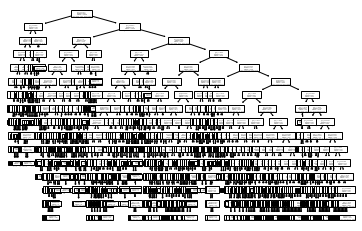

In [95]:
#TODO: Display the decision tree
from sklearn import tree
tree.plot_tree(dt_classifier)

### Step 10 – Summarize the results using one paragraph (2-5 sentences)

In [ ]:
# Summary 

# I think the results of this second decision tree are significantly better than the first results in part one.  Albeit,
# the visualization did get extremely worse from part one to part two, but it appears to be a worthwhile trade off since
# the model is performing much better.  This performance improvement is seen in the accuracy score changing from about 
# 66 percent in the first model up to a much stronger 92 percent in this notebook's model.  The change is due to the 
# cross validating that was performed and the hypertuning of the parameters.  Iterating through random paramters to find 
# optimizations is always the best for strengthening model performances.